先定義好各涵式，以及資料前處理。

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.utils.data as data
import os
import cv2
from PIL import Image

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
train_list = df1.values.T[0]
test_list = df2.values.T[0]
train_label = df1['category'].values
test_label = df2['category'].values
image_path = 'images/'
files = os.listdir(image_path)

In [17]:
def resize_data(path,data_list):
    length = len(data_list)
    res = np.zeros([length,3,50,50])
    for i,j in list(enumerate(data_list)):
        img = Image.open(path+j).convert('RGB').resize([50,50])
        res[i] = np.swapaxes(img,0,-1)
    return res/255
def cropping(path,files,df):
    cropping_list = []
    for f in files:
        r = path+f
        img = cv2.imread(r)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        for i in range(df['file_name'].size):
            if f == df['file_name'][i]:
                label = df['category'][i]
                x1 = df['x1'][i]
                x2 = df['x2'][i]
                y1 = df['y1'][i]
                y2 = df['y2'][i]
                img_cropping = img[x1:x2,y1:y2]
                rimg = cv2.resize(img_cropping,(50,50),interpolation=cv2.INTER_LANCZOS4)
                cropping_file = np.swapaxes(np.swapaxes(rimg,0,-1),1,2)
                tensor_cropping = torch.Tensor(cropping_file)/255
                cropping_list.append((tensor_cropping,label))
                break
    return cropping_list

def preprocessing(img,label):
    loader = []
    for i in range(len(img)):
        loader.append((img[i],label[i]))
    return loader

In [4]:
def plot_scatter(two_dims,target,epoch):
    x = []
    y = []
    plt.scatter(x,y,color='blue',label='0')
    plt.scatter(x,y,color='orange',label='1')
    plt.scatter(x,y,color='red',label='2')
    plt.scatter(x,y,color='green',label='3')
    plt.scatter(x,y,color='brown',label='4')
    plt.scatter(x,y,color='purple',label='5')
    plt.scatter(x,y,color='pink',label='6')
    for i in range(len(two_dims)):
        if target[i] == 0:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='blue')
          
        if target[i] == 1:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='orange')
             
        if target[i] == 2:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='red')
            
        if target[i] == 3:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='green')
             
        if target[i] == 4:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='brown')
        if target[i] == 5:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='purple')
        if target[i] == 6:
            plt.scatter(two_dims[i][0],two_dims[i][1],color='pink')
    plt.legend(loc = 'best')
    plt.title("epoch {}".format(epoch))
    plt.show()

In [5]:
def plot_curve(train_accu,test_accu,train_loss,test_loss,epoch):
    plt.figure(1)
    x = np.arange(0,epoch,1)
    plt.plot(x,train_accu,color='red',label='Training')
    plt.plot(x,test_accu,color='blue',label='Testing')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend(loc='best')
    plt.show()
    plt.figure(2)
    plt.plot(x,train_loss,color='red',label='Training')
    plt.plot(x,test_loss,color='blue',label='Testing')
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss')
    plt.title('Loss')
    plt.legend(loc='best')
    plt.show()

In [5]:
train_img = torch.Tensor(resize_data(image_path,train_list))
test_img = torch.Tensor(resize_data(image_path,test_list))

In [6]:
train_loader = preprocessing(train_img,train_label)
test_loader = preprocessing(test_img,test_label)

In [7]:
train_data_loader = data.DataLoader(train_loader,batch_size=50,shuffle=True)
test_data_loader = data.DataLoader(test_loader,batch_size=50,shuffle=False)

In [6]:
class cnn(nn.Module):
    def __init__(self,num_classes=7):
        super(cnn, self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5,stride=2))
        self.conv2=nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5,stride=2))
        self.fc1=nn.Linear(3200,2)
        self.fc2=nn.Linear(2,num_classes)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=out.reshape(out.size(0),-1)
        out_two_dimension=self.fc1(out)
        output=self.fc2(out_two_dimension)
        return output , out_two_dimension

In [38]:
class cnn_try(nn.Module):
    def __init__(self,num_classes=7):
        super(cnn_try, self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5,stride=2))
        self.conv2=nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5,stride=2))
#         self.conv3=nn.Sequential(
#             nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=5,stride=2))
#         self.conv4=nn.Sequential(
#             nn.Conv2d(32,64,kernel_size=5,stride=1,padding=2),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=5,stride=2))
#         self.fc1=nn.Linear(6*6*16,2)
#         self.fc2=nn.Linear(2,num_classes)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
#         out=self.conv3(out)
#         out = self.conv4(out)
#         out=out.reshape(out.size(0),-1)
#         out_two_dimension=self.fc1(out)
#         output=self.fc2(out_two_dimension)
        return out

In [39]:
m = cnn_try(7)

In [40]:
j = m(train_img)

In [41]:
j.shape

torch.Size([1407, 32, 10, 10])

In [7]:
def train_model(model,train_loader,test_loader,optimizer,epochs):
    total_accu = []
    total_loss = []
    total_test_accu = []
    total_test_loss = []
    out4_dims = []
    target4 = []
    out49_dims = []
    target49 = []
    for e in range(epochs):
        train_loss = 0
        train_accu = 0
        test_loss = 0
        test_accu = 0
        model.train()
        for batch,(data,target) in enumerate(train_loader):
            optimizer.zero_grad()
            out,two_dims = model(data)
            loss = F.cross_entropy(out,target)
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            model.eval()
            for data_train,target_train in train_loader:
                out_train,train_two_dims = model(data_train)
                train_loss += F.cross_entropy(out_train,target_train,reduction='sum').item()
                predict_train = out_train.data.max(1,keepdim=True)[1]
                train_accu += predict_train.eq(target_train.data.view_as(predict_train)).sum().item()
                if e == 4:
                    for i in range(len(data_train)):
                        out4_dims.append(train_two_dims.numpy()[i])
                        target4.append(target_train.numpy()[i])
                if e == 49:
                    for i in range(len(data_train)):
                        out49_dims.append(train_two_dims.numpy()[i])
                        target49.append(target_train.numpy()[i])
            for data_test,target_test in test_loader:
                out_test,test_two_dims = model(data_test)
                test_loss += F.cross_entropy(out_test,target_test,reduction='sum').item()
                predict_test = out_test.data.max(1,keepdim=True)[1]
                test_accu += predict_test.eq(target_test.data.view_as(predict_test)).sum().item()
            train_loss /= len(train_loader.dataset)
            test_loss /= len(test_loader.dataset)
            train_accu = float(train_accu)/len(train_loader.dataset)
            test_accu = float(test_accu)/len(test_loader.dataset)
        total_accu.append(train_accu)
        total_loss.append(train_loss)
        total_test_accu.append(test_accu)
        total_test_loss.append(test_loss)
    return total_accu,total_loss,total_test_accu,total_test_loss,out4_dims,target4,out49_dims,target49

1.(a)(b)

In [155]:
model=cnn(7)
optimizer = optim.Adam(model.parameters(),lr=5e-4)

In [156]:
train_accu,train_loss,test_accu,test_loss,ep5,ep5_target,ep70,ep70_target = train_model(model,train_data_loader,test_data_loader,optimizer,70)

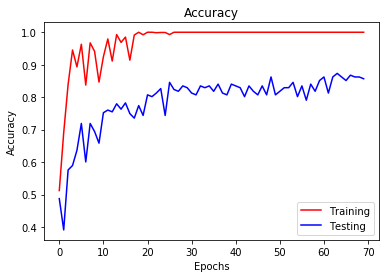

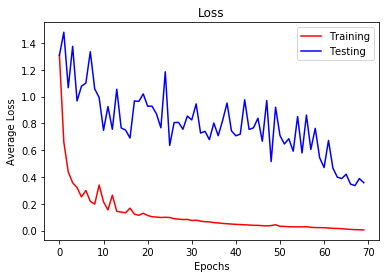

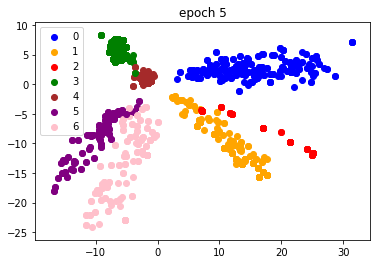

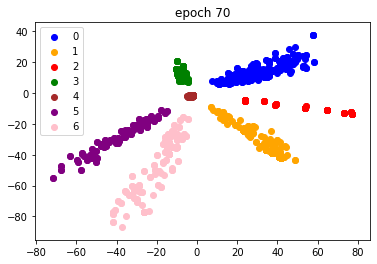

In [157]:
plot_curve(train_accu,test_accu,train_loss,test_loss,70)
plot_scatter(ep5,ep5_target,5)
plot_scatter(ep70,ep70_target,70)

2.(a)

In [8]:
train_c = cropping(image_path,files,df1)
test_c = cropping(image_path,files,df2)

In [9]:
train_c_loader = data.DataLoader(train_c, batch_size=60, shuffle=True,  num_workers=4)
test_c_loader = data.DataLoader(test_c, batch_size=60, shuffle=False,  num_workers=4)

In [14]:
model=cnn(7)
optimizer = optim.Adam(model.parameters(),lr=5e-4)

In [15]:
train_accu_c,train_loss_c,test_accu_c,test_loss_c,ep5_c,ep5_c_t,ep70_c,ep70_c_t = train_model(model,train_c_loader,test_c_loader,optimizer,70)

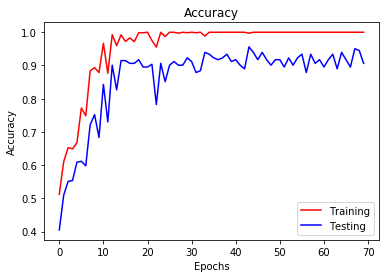

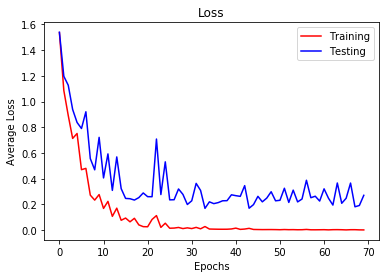

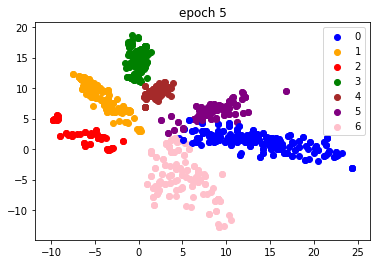

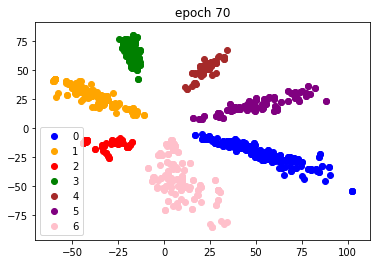

In [16]:
plot_curve(train_accu_c,test_accu_c,train_loss_c,test_loss_c,70)
plot_scatter(ep5_c,ep5_c_t,5)
plot_scatter(ep70_c,ep70_c_t,70)

2.(b)

由畫出的圖可發現，在epoch為5的時候，資料分布還無法被分得很明顯。但epoch到70時，不論是否有經過cropping，分布的效果都已十分顯著。再來觀察有cropping過的資料，可發現收斂效果較好，testing data的正確率也有較好的表現，我想是因為cropping過的資料有類似被Attention的作用，讓資料的特徵能更被輕易找到。